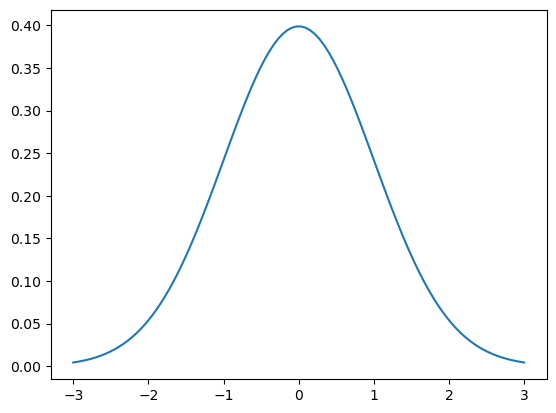

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

Text(0.5, 1.0, 'Probability density function of normal distribution')

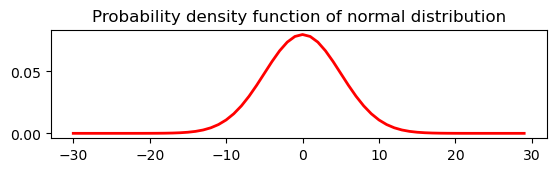

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-30,30)

# Generate normal distribution with given mean and standard deviation.
dist = norm(mu, sigma)

# Plot probability density function and of this distribution.
# the pdf() method takes takes in a list x values and returns a list of y's.
plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
plt.title('Probability density function of normal distribution')

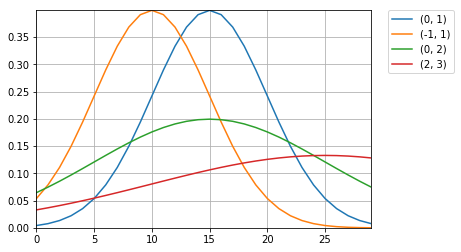

In [14]:
from matplotlib import pyplot as plt
import numpy as np

def gaussian(x, mu, sig):
    return 1./(sig * np.sqrt(2. *np.pi )) * np.exp(-(x - mu)**2 / (2. * sig**2))

rng = range(-30,30)

for mu, sig in [(0, 1), (-1, 1), (0, 2), (2, 3)]:
    plt.plot(gaussian(np.arange(-3, 3, step=0.2), mu, sig), label="(" + str(mu) + ", " + str(sig) + ")")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.autoscale(tight=True)
plt.grid()
plt.show()


Consider two variables, $x_0$ and $x_1$, which correlate perfectly, but in opposite directions:

In [31]:
x = np.array([1,2,3,4])
y = np.array([7,6,5])
XX, YY = np.meshgrid(x, y)
print(XX)
print(YY)
print(XX.shape)
print(YY.shape)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[7 7 7 7]
 [6 6 6 6]
 [5 5 5 5]]
(3, 4)
(3, 4)


In [6]:
N = 60
X = np.linspace(-3, 3, N)
print(X)

[-3.         -2.89830508 -2.79661017 -2.69491525 -2.59322034 -2.49152542
 -2.38983051 -2.28813559 -2.18644068 -2.08474576 -1.98305085 -1.88135593
 -1.77966102 -1.6779661  -1.57627119 -1.47457627 -1.37288136 -1.27118644
 -1.16949153 -1.06779661 -0.96610169 -0.86440678 -0.76271186 -0.66101695
 -0.55932203 -0.45762712 -0.3559322  -0.25423729 -0.15254237 -0.05084746
  0.05084746  0.15254237  0.25423729  0.3559322   0.45762712  0.55932203
  0.66101695  0.76271186  0.86440678  0.96610169  1.06779661  1.16949153
  1.27118644  1.37288136  1.47457627  1.57627119  1.6779661   1.77966102
  1.88135593  1.98305085  2.08474576  2.18644068  2.28813559  2.38983051
  2.49152542  2.59322034  2.69491525  2.79661017  2.89830508  3.        ]


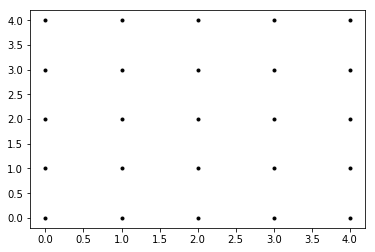

In [24]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);
xx, yy = np.meshgrid(xvalues, yvalues)
plt.plot(xx, yy, marker='.', color='k', linestyle='none')

(100,)
(100,)
(1, 100)
(100, 1)
(100, 100)


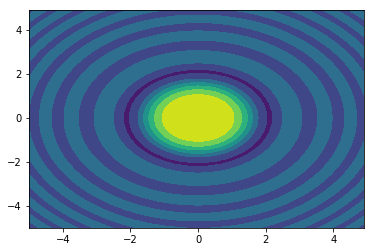

In [37]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
print(x.shape)
print(y.shape)
print(xx.shape)
print(yy.shape)
print(z.shape)
#print(yy)

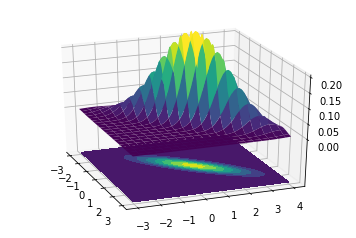

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 1.1], [1.1,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [40]:
X.shape + (2,)

(60, 60, 2)

In [46]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])